#### import libraries 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#### read and edit train and test data

In [2]:
df_train = pd.read_csv("../Data/House Price Prediction/train.csv")
df_train["date"] = pd.to_datetime(df_train["date"])
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
#print(df_train.head())

df_test = pd.read_csv("../Data/House Price Prediction/test.csv")
df_test["date"] = pd.to_datetime(df_test["date"])
df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month

#### set features and targets matrices for the train data

In [3]:
X_train = df_train.drop(['id', 'date', 'price', 'zipcode'],axis=1)
y_train = df_train["price"]

X_test = df_test.drop(['id', 'date', 'zipcode'],axis=1)

#### Linear Regression of train data 

In [4]:
reg1 = lm.LinearRegression()
reg1.fit(X_train, y_train)
Pred1 = reg1.predict(X_train)
print('Raw Data RMSE is:',round(np.sqrt(mse(y_train,Pred1)),2))
print('Raw Data R2 is:',round(r2_score(y_train,Pred1),2))

Raw Data RMSE is: 208926.31
Raw Data R2 is: 0.69


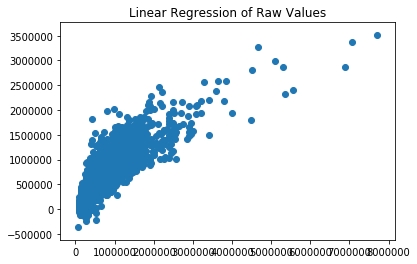

In [5]:
plt.plot(y_train, Pred1, '.')
plt.scatter(y_train, Pred1)
plt.title('Linear Regression of Raw Values')
plt.show()

#### Scaling with Standard Scaler 

In [6]:
scaleit = StandardScaler()
X_train1 = scaleit.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train1, columns=X_train.columns)

X_test1 = scaleit.transform(X_test)
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns)

#### 2nd Order Polynomial

In [7]:
poly = PolynomialFeatures(2)
X_train2 = poly.fit_transform(X_train1)
ploynames = poly.get_feature_names(X_train1.columns)
X_train2 = pd.DataFrame(X_train2, columns=ploynames)

X_test2 = poly.fit_transform(X_test1)
ploynames2 = poly.get_feature_names(X_test1.columns)
X_test2 = pd.DataFrame(X_test2, columns=ploynames2)

#### Linear Regression of 2nd Order Polynomial of Scaled Date

In [8]:
reg2=lm.LinearRegression()
reg2.fit(X_train2,y_train)
Pred2=reg2.predict(X_train2)
print('2nd Order PN of SD RMSE is:',round(np.sqrt(mse(y_train,Pred2)),2))
print('2nd Order PN of SD R2 is:',round(r2_score(y_train,Pred2),2))

2nd Order PN of SD RMSE is: 152303.79
2nd Order PN of SD R2 is: 0.84


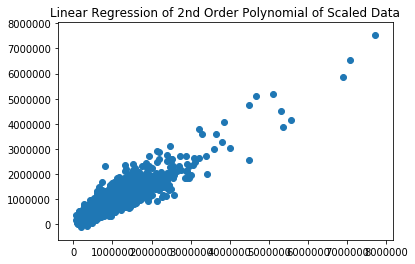

In [9]:
plt.plot(y_train,Pred2,'.')
plt.scatter(y_train,Pred2)
plt.title('Linear Regression of 2nd Order Polynomial of Scaled Data')
plt.show()

#### Useing KNN Regressor

In [10]:
neigh1 = KNN(n_neighbors=3, weights='uniform')
neigh1.fit(X_train2, y_train)
Pred3 = neigh1.predict(X_train2)
print('MSE of KNN regression with unifrom weights on 2nd order data is :',round(np.sqrt(mse(y_train,Pred3)),2))
print('R2 score of KNN regression with unifrom weights on 2nd order data is :',round(r2_score(y_train,Pred3),2))


neigh2 = KNN(n_neighbors=3, weights='distance')
neigh2.fit(X_train2, y_train)
Pred4 = neigh2.predict(X_train2)
print('MSE of KNN regression with nonunifrom weights on 2nd order data is :',round(np.sqrt(mse(y_train,Pred4)),2))
print('R2 score of KNN regression with nonunifrom weights on 2nd order data is :',round(r2_score(y_train,Pred4),2))

MSE of KNN regression with unifrom weights on 2nd order data is : 131640.14
R2 score of KNN regression with unifrom weights on 2nd order data is : 0.88
MSE of KNN regression with nonunifrom weights on 2nd order data is : 0.0
R2 score of KNN regression with nonunifrom weights on 2nd order data is : 1.0


#### Using Bagging Regressor 

In [18]:
bgr1 = BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=0.9, max_features=0.9)
bgr1.fit(X_train2, y_train)

Pred5 = bgr1.predict(X_train2)
print('MSE of Bagging regression on 2nd order data is :',round(np.sqrt(mse(y_train,Pred5)),2))
print('R2 score of Bagging regression on 2nd order data is :',round(r2_score(y_train,Pred5),2))

MSE of Bagging regression on 2nd order data is : 66683.76
R2 score of Bagging regression on 2nd order data is : 0.97


#### Using Bagging Regressor on KNN Regressor 

In [12]:
bgr2 = BaggingRegressor(base_estimator=neigh1, n_estimators=10, max_samples=0.9, max_features=0.9)
bgr2.fit(X_train2, y_train)

Pred6 = bgr2.predict(X_train2)
print('MSE of Bagging regression on KNN with unifrom weights on 2nd order data is :',round(np.sqrt(mse(y_train,Pred6)),2))
print('R2 score of Bagging regression on KNN with unifrom weights on 2nd order data is :',round(r2_score(y_train,Pred6),2))

bgr3 = BaggingRegressor(base_estimator=neigh2, n_estimators=10, max_samples=0.9, max_features=0.9)
bgr3.fit(X_train2, y_train)

Pred7 = bgr3.predict(X_train2)
print('MSE of Bagging regression on KNN with nonunifrom weights on 2nd order data is :',round(np.sqrt(mse(y_train,Pred7)),2))
print('R2 score of Bagging regression on KNN with nonunifrom weights on 2nd order data is :',round(r2_score(y_train,Pred7),2))

MSE of Bagging regression on KNN with unifrom weights on 2nd order data is : 135375.84
R2 score of Bagging regression on KNN with unifrom weights on 2nd order data is : 0.87
MSE of Bagging regression on KNN with nonunifrom weights on 2nd order data is : 83050.0
R2 score of Bagging regression on KNN with nonunifrom weights on 2nd order data is : 0.95


#### Cross Validation of different Regressors 

In [19]:
csv1 = cross_val_score(bgr1, X_train2, y_train, cv=5)
print("Cross validation of the Bagging Regression is:", csv1)

csv2 = cross_val_score(bgr2, X_train2, y_train, cv=5)
print("Cross validation of the Bagging Regression with KNN is:", csv2)

csv3 = cross_val_score(bgr3, X_train2, y_train, cv=5)
print("Cross validation of the Bagging Regression with KNN with nonuniform is:", csv3)

Cross validation of the Bagging Regression is: [0.82165668 0.86158233 0.81615003 0.83033713 0.87633319]
Cross validation of the Bagging Regression with KNN is: [0.74675872 0.74802231 0.7179137  0.76945173 0.72982421]
Cross validation of the Bagging Regression with KNN with nonuniform is: [0.74447373 0.74927438 0.72145322 0.76494368 0.72239537]


#### Desicion Tree Regression 

In [24]:
dt = DecisionTreeRegressor(criterion="mse", splitter="best", max_depth=7, min_samples_leaf=4)
dt.fit(X_train2, y_train)

Pred8 = dt.predict(X_train2)
print('MSE of Desicion Tree Regression is :',round(np.sqrt(mse(y_train,Pred8)),2))
print('R2 score of Desicion Tree Regression is :',round(r2_score(y_train,Pred8),2))

MSE of Desicion Tree Regression is : 138240.59
R2 score of Desicion Tree Regression is : 0.87


In [21]:
pred_tst = bgr1.predict(X_test2)
df_test['price'] = pred_tst

#### write outputs into a csv file

In [22]:
df_test.to_csv('test_priced_KNN_Baggings.csv')